In [2]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('assets/adult.csv')

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.duplicated().sum()

52

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

# Handling Missing Values
1. Leave as it is
2. Fill the missing values
3. Drop missing values

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

# Drop missing values
# DataFrameName.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

axis: axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String.
how: how takes string value of two kinds only (‘any’ or ‘all’). ‘any’ drops the row/column if ANY value is Null and ‘all’ drops only if ALL values are null.
thresh: thresh takes integer value which tells minimum amount of na values to drop.
subset: It’s an array which limits the dropping process to passed rows/columns through list.
inplace: It is a boolean which makes the changes in data frame itself if True.

In [ ]:
temp = pd.DataFrame({
    "Name":['Abc',"PQR", np.nan,"XYZ"],
    "Roll No":[1,np.nan,3,4]
})

In [ ]:
temp

,Name,Roll No
0,Abc,1.0
1,PQR,NaN
2,NaN,3.0
3,XYZ,4.0


In [ ]:
temp=temp.dropna(inplace=False)

In [ ]:
temp

,Name,Roll No
0,Abc,1.0
3,XYZ,4.0


# Fill the rows with missing values

# DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

value : Static, dictionary, array, series or dataframe to fill instead of NaN. 
method : Method is used if user doesn’t pass any value. Pandas has different methods like bfill, backfill or ffill which fills the place with value in the Forward index or Previous/Back respectively. 
axis: axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String 
inplace: It is a boolean which makes the changes in data frame itself if True. 
limit : This is an integer value which specifies maximum number of consecutive forward/backward NaN value fills. downcast : It takes a dict which specifies what dtype to downcast to which one. Like Float64 to int64. 
**kwargs : Any other Keyword arguments

In [ ]:
temp

,Name,Roll No
0,Abc,1.0
3,XYZ,4.0


In [ ]:
temp.fillna(method='ffill',inplace=True)

/tmp/ipykernel_19328/2967702086.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temp.fillna(method='ffill',inplace=True)
/tmp/ipykernel_19328/2967702086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.fillna(method='ffill',inplace=True)


In [ ]:
temp

,Name,Roll No
0,Abc,1.0
3,XYZ,4.0


# Simple Imputer
 It replaces the NaN values with a specified placeholder. 
 
 missing_values : The missing_values placeholder which has to be imputed. By default is NaN 
strategy : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’. 
fill_value : The constant value to be given to the NaN data using the constant strategy. 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

df['workclass'] = imputer.fit_transform(df[['workclass']]).ravel()
df['occupation'] = imputer.fit_transform(df[['occupation']]).ravel()
df['native-country'] = imputer.fit_transform(df[['native-country']]).ravel()

In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Handling Categorical Data
1. Replace
2. Label Encoding
3. One hot Encoding

In [ ]:
print(df['gender'].unique())

['Male' 'Female']


In [ ]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [ ]:
temp_df = pd.DataFrame({
    'Fruit_Name':['Mango','Apple','Banana','Grapes'],
    'Fruit_Color':['Yellow','Red','Yellow','Green'],
    'Fruit_Price':[1000,300,50,100]
})

In [ ]:
temp_df

,Fruit_Name,Fruit_Color,Fruit_Price
0,Mango,Yellow,1000
1,Apple,Red,300
2,Banana,Yellow,50
3,Grapes,Green,100


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()
temp_df['Fruit_Name']=lbl_encoder.fit_transform(temp_df['Fruit_Name'])


In [ ]:
temp_df

,Fruit_Name,Fruit_Color,Fruit_Price
0,3,Yellow,1000
1,0,Red,300
2,1,Yellow,50
3,2,Green,100


In [ ]:
temp_df=pd.get_dummies(temp_df,columns=['Fruit_Color'])

In [ ]:
temp_df

,Fruit_Name,Fruit_Price,Fruit_Color_Green,Fruit_Color_Red,Fruit_Color_Yellow
0,3,1000,False,False,True
1,0,300,False,True,False
2,1,50,False,False,True
3,2,100,True,False,False


In [ ]:
print(df['income'].unique())


['<=50K' '>50K']


In [ ]:
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [ ]:
print(df['income'].unique())

[0 1]


In [ ]:
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [ ]:
df['marital-status'] = df['marital-status'].replace('Never-married', 'Unmarried')
df['marital-status'] = df['marital-status'].replace('Married-AF-spouse', 'Married')
df['marital-status'] = df['marital-status'].replace('Married-civ-spouse', 'Married')
df['marital-status'] = df['marital-status'].replace('Married-spouse-absent', 'Unmarried')
df['marital-status'] = df['marital-status'].replace('Separated', 'Separated')
df['marital-status'] = df['marital-status'].replace('Divorced', 'Separated')
df['marital-status'] = df['marital-status'].replace('Widowed', 'Widowed')

In [ ]:
df['marital-status']=lbl_encoder.fit_transform(df['marital-status'])

In [ ]:
print(df['marital-status'].unique())

[2 0 3 1]


In [ ]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
df['education'] = df['education'].replace('Preschool', 'dropout')
df['education'] = df['education'].replace('10th', 'dropout')
df['education'] = df['education'].replace('11th', 'dropout')
df['education'] = df['education'].replace('12th', 'dropout')
df['education'] = df['education'].replace('1st-4th', 'dropout')
df['education'] = df['education'].replace('5th-6th', 'dropout')
df['education'] = df['education'].replace('7th-8th', 'dropout')
df['education'] = df['education'].replace('9th', 'dropout')
df['education'] = df['education'].replace('HS-Grad', 'HighGrad')
df['education'] = df['education'].replace('HS-grad', 'HighGrad')
df['education'] = df['education'].replace('Some-college', 'CommunityCollege')
df['education'] = df['education'].replace('Assoc-acdm', 'CommunityCollege')
df['education'] = df['education'].replace('Assoc-voc', 'CommunityCollege')
df['education'] = df['education'].replace('Bachelors', 'Bachelors')
df['education'] = df['education'].replace('Masters', 'Masters')
df['education'] = df['education'].replace('Prof-school', 'Masters')
df['education'] = df['education'].replace('Doctorate', 'Doctorate')

In [ ]:
df['education'].unique()

array(['dropout', 'HighGrad', 'CommunityCollege', 'Masters', 'Bachelors',
       'Doctorate'], dtype=object)

In [ ]:
df['education']=lbl_encoder.fit_transform(df['education'])

In [ ]:

df['workclass'] = lbl_encoder.fit_transform(df['workclass'])
df['occupation'] = lbl_encoder.fit_transform(df['occupation'])
df['relationship'] = lbl_encoder.fit_transform(df['relationship'])
df['race'] = lbl_encoder.fit_transform(df['race'])
df['native-country'] = lbl_encoder.fit_transform(df['native-country'])


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,5,7,2,6,3,2,1,0,0,40,38,0
1,38,3,89814,3,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,1,12,0,10,0,4,1,0,0,40,38,1
3,44,3,160323,1,10,0,6,0,2,1,7688,0,40,38,1
4,18,3,103497,1,10,2,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,1,12,0,12,5,4,0,0,0,38,38,0
48838,40,3,154374,3,9,0,6,0,4,1,0,0,40,38,1
48839,58,3,151910,3,9,3,0,4,4,0,0,0,40,38,0
48840,22,3,201490,3,9,2,0,3,4,1,0,0,20,38,0


# Outlier Detection
1. Use BoxPlot
2. Use Scatter Plot
3. Use Z score
4. Inter Quartile Range

<Axes: ylabel='age'>

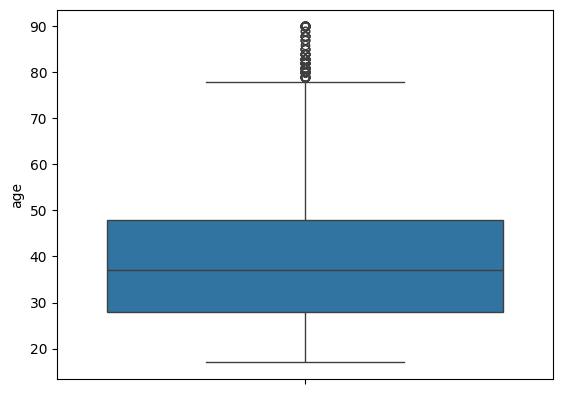

In [ ]:
import seaborn as sns
sns.boxplot(df['age'])

In [ ]:
print(df['age'].sort_values().unique())

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]


In [ ]:
test= np.where(df['age']>78)
print(test)

(array([  193,   234,   898,   925,   950,  1078,  1397,  1833,  2084,
        2289,  2981,  3495,  3667,  4454,  4645,  4657,  6401,  6576,
        6756,  6914,  6958,  6975,  6978,  7159,  7169,  7413,  7418,
        7538,  7546,  7936,  8205,  8312,  8426,  8954,  8981,  9017,
        9037,  9080,  9278,  9768,  9887, 10038, 10198, 10222, 10734,
       11286, 11325, 11407, 11834, 11868, 11878, 11937, 12057, 12226,
       12443, 13022, 13954, 14029, 14259, 14295, 14427, 14564, 14587,
       14736, 15084, 15094, 15404, 15930, 15958, 15998, 16101, 16143,
       16246, 16350, 16498, 16706, 17194, 17316, 17444, 18211, 18578,
       19029, 19166, 19181, 19485, 19612, 19810, 20050, 20236, 20343,
       20382, 20992, 21106, 21542, 21561, 21640, 21676, 22270, 22443,
       22484, 22502, 22709, 22894, 23018, 23751, 23990, 24142, 24445,
       24650, 24700, 24791, 24963, 25075, 25231, 25241, 25737, 26388,
       26474, 26809, 27363, 27502, 27776, 27796, 27994, 28259, 28714,
       28755, 29093

In [ ]:
sorted_df = df.sort_values(by=['age'],ascending=True)

Q1=np.percentile(sorted_df['age'],25)

Q3=np.percentile(sorted_df['age'],75)

IQR = Q3-Q1
print(IQR)

20.0


In [ ]:
lwr_bound = Q1-(1.5*IQR)
upr_bound = Q3+(1.5*IQR)
print("min: ", lwr_bound, " Max: ", upr_bound)

min:  -2.0  Max:  78.0


In [ ]:
outliers=[]
for i in df['age']:
    if(i<lwr_bound or i>upr_bound):
        outliers.append(i)
print("No. of outliers: ",len(outliers))
print(outliers)

No. of outliers:  215
[79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


# Handling Outliers
1. Removing outliers
2. Quartile based flooring and capping
3. Mean/Meadian Imputation

In [ ]:
median=np.median(df['age'])
print(median)
for i in outliers:
    df['age'] = np.where(df['age']==i,37,df['age'])


37.0


In [ ]:
df['age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

# Data Sampling

In [ ]:
df['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [ ]:
# Random Sampling
lt_fifty_k=df[df['income']==0]
gt_fifty_k=df[df['income']==1]

print("<=50k: ", lt_fifty_k.shape)
print(">50k: ", gt_fifty_k.shape)

<=50k:  (37109, 15)
>50k:  (11681, 15)


In [ ]:
no_sample=lt_fifty_k.sample(n=11681)

In [ ]:
no_sample.shape

(11681, 15)

In [ ]:
sampled_df=pd.concat([no_sample,gt_fifty_k],axis=0)

In [ ]:
sampled_df.shape

(23362, 15)

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,5,7,2,6,3,2,1,0,0,40,38,0
1,38,3,89814,3,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,1,12,0,10,0,4,1,0,0,40,38,1
3,44,3,160323,1,10,0,6,0,2,1,7688,0,40,38,1
4,18,3,103497,1,10,2,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,1,12,0,12,5,4,0,0,0,38,38,0
48838,40,3,154374,3,9,0,6,0,4,1,0,0,40,38,1
48839,58,3,151910,3,9,3,0,4,4,0,0,0,40,38,0
48840,22,3,201490,3,9,2,0,3,4,1,0,0,20,38,0


In [ ]:
X = df.drop('income',axis=1)
y = df['income']

In [ ]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (48790, 14)
Shape of y:  (48790,)


In [ ]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.044471,-0.073595,0.063870,0.036319,-0.341045,-0.002090,-0.265529,0.027914,0.089179,0.077915,0.056658,0.087974,-0.002915,0.238085
workclass,0.044471,1.000000,-0.026516,0.011353,0.007331,-0.054321,0.009878,-0.056085,0.053939,0.066675,0.031554,0.004160,0.042887,-0.004872,-0.000508
fnlwgt,-0.073595,-0.026516,1.000000,0.019093,-0.038727,0.023984,-0.002391,0.009017,-0.027165,0.027879,-0.003715,-0.004378,-0.013521,-0.058299,-0.006309
education,0.063870,0.011353,0.019093,1.000000,-0.605655,0.008609,0.006641,0.021186,-0.020251,0.033225,-0.006344,-0.024376,-0.060474,-0.081753,-0.134587
educational-num,0.036319,0.007331,-0.038727,-0.605655,1.000000,-0.084470,0.072688,-0.090697,0.029331,0.009364,0.125219,0.080986,0.143915,0.089359,0.332802
marital-status,-0.341045,-0.054321,0.023984,0.008609,-0.084470,1.000000,0.001833,0.450723,-0.086343,-0.378383,-0.079394,-0.069299,-0.246011,0.001027,-0.415356
occupation,-0.002090,0.009878,-0.002391,0.006641,0.072688,0.001833,1.000000,-0.035054,-0.005158,0.042773,0.014498,0.011048,-0.015454,-0.001643,0.032533
relationship,-0.265529,-0.056085,0.009017,0.021186,-0.090697,0.450723,-0.035054,1.000000,-0.116985,-0.579955,-0.056543,-0.057243,-0.250319,-0.007092,-0.253175
race,0.027914,0.053939,-0.027165,-0.020251,0.029331,-0.086343,-0.005158,-0.116985,1.000000,0.086959,0.011610,0.018640,0.039759,0.117740,0.070970
gender,0.089179,0.066675,0.027879,0.033225,0.009364,-0.378383,0.042773,-0.579955,0.086959,1.000000,0.047127,0.045517,0.228529,-0.002544,0.214639


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.06900686, 0.0182598 , 0.03925851, 0.06534217, 0.06421743,
       0.11206211, 0.05162246, 0.11645155, 0.01052794, 0.02917189,
       0.08064038, 0.03397602, 0.04106445, 0.01139759])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

relationship       0.116452
marital-status     0.112062
capital-gain       0.080640
age                0.069007
education          0.065342
educational-num    0.064217
occupation         0.051622
hours-per-week     0.041064
fnlwgt             0.039259
capital-loss       0.033976
gender             0.029172
workclass          0.018260
native-country     0.011398
race               0.010528
dtype: float64

<Axes: >

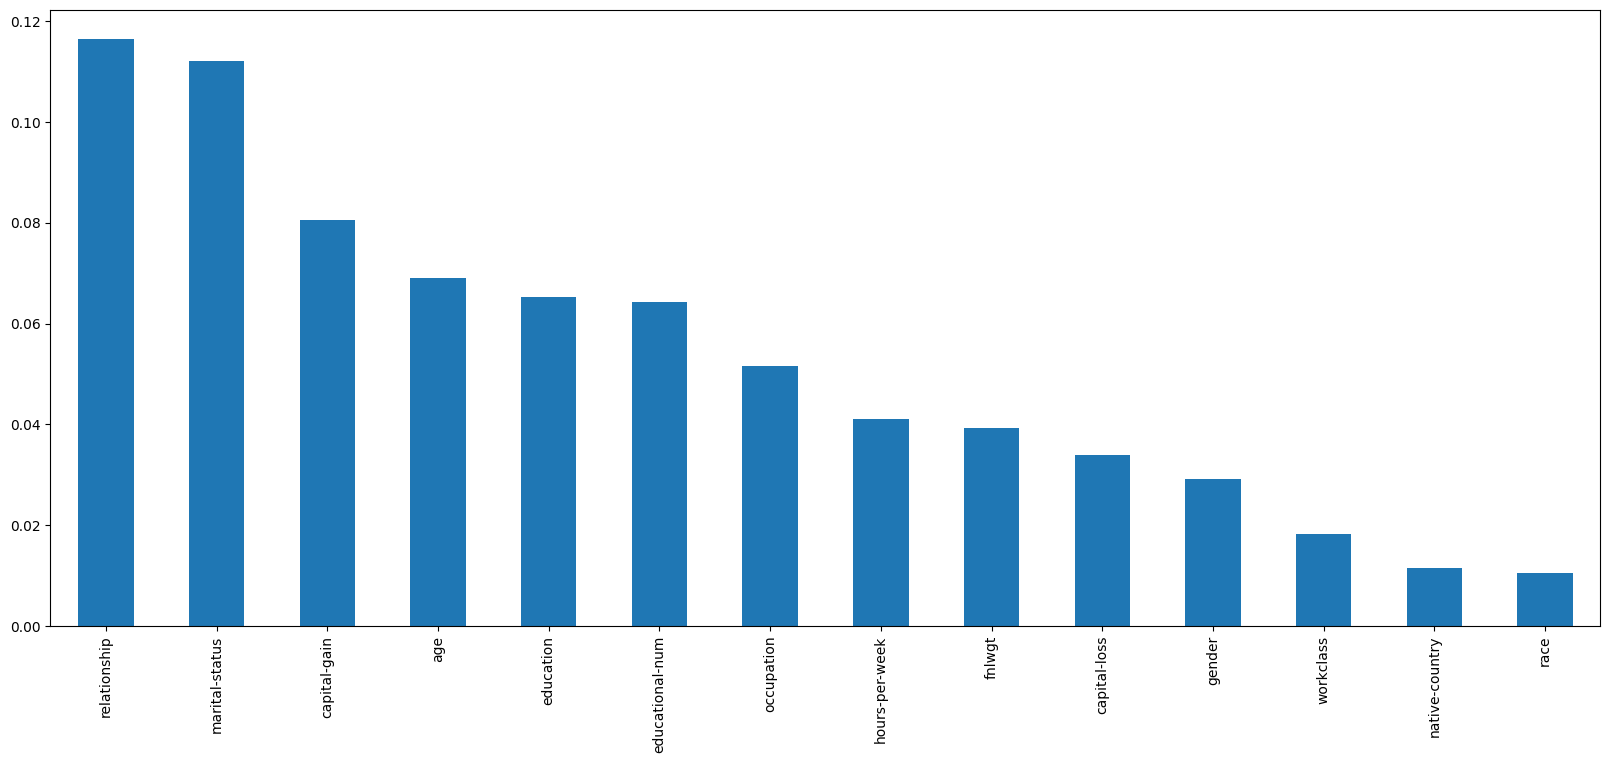

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

<Axes: >

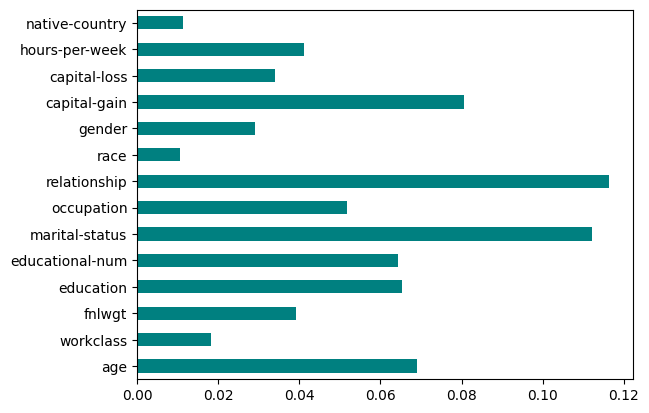

In [ ]:

imp_feat=pd.Series(mutual_info,df.columns[0:len(df.columns)-1])
imp_feat.plot(kind="barh",color="teal")

In [ ]:
X = df.drop(['workclass','race','native-country','fnlwgt','marital-status','relationship','income'],axis=1)

In [ ]:
X

,age,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week
0,25,5,7,6,1,0,0,40
1,38,3,9,4,1,0,0,50
2,28,1,12,10,1,0,0,40
3,44,1,10,6,1,7688,0,40
4,18,1,10,9,0,0,0,30
...,...,...,...,...,...,...,...,...
48837,27,1,12,12,0,0,0,38
48838,40,3,9,6,1,0,0,40
48839,58,3,9,0,0,0,0,40
48840,22,3,9,0,1,0,0,20


In [ ]:
from sklearn.model_selection import train_test_split
x_temp=temp_df.drop('Fruit_Price',axis=1)
y_temp=temp_df['Fruit_Price']

In [ ]:
temp_df

,Fruit_Name,Fruit_Price,Fruit_Color_Green,Fruit_Color_Red,Fruit_Color_Yellow
0,3,1000,False,False,True
1,0,300,False,True,False
2,1,50,False,False,True
3,2,100,True,False,False


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0,shuffle=True)

In [ ]:
print(xtrain.shape, ytrain.shape)

(2, 4) (2,)


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [ ]:
print('X_Training Shape: ', X_train.shape)
print('X_Testing Shape: ', X_test.shape)
print('Y_Training Shape: ', y_train.shape)
print('Y_Testing Shape: ', y_test.shape)

X_Training Shape:  (34153, 8)
X_Testing Shape:  (14637, 8)
Y_Training Shape:  (34153,)
Y_Testing Shape:  (14637,)


# Data Scaling
1. MinMax Scaler
2. Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [ ]:
X_train_std.shape

(34153, 8)

# END of Data Preprocessing Assignment

# Sample Model Development Using Tensorflow (Simple ANN)

In [ ]:
# Model Development
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

2024-01-30 18:23:04.615945: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 18:23:04.920219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 18:23:04.921861: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 18:23:06.235546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(8,input_shape=(8,),activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_std,y_train,batch_size=32,epochs=10)

NameError: name 'model' is not defined

In [ ]:
# y_pred = model.predict(X_test)
# print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test),axis=1)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (8,),activation = 'relu' , batch_size = 32 , verbose = True , max_iter = 10 , solver = 'sgd')

In [ ]:
mlp

In [ ]:
mlp.fit(X_train_std , y_train)

In [ ]:
mlp.score(X_train_std , y_train)

In [ ]:
mlp.score(X_test_std , y_test)

In [ ]:
y_pred_skln = mlp.predict(X_test)

In [ ]:
print(y_pred_skln)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , RocCurveDisplay , auc


In [ ]:
cm = confusion_matrix(y_test , y_pred_skln)
cm

In [ ]:
cr = classification_report(y_test , y_pred_skln)
print(cr)

In [ ]:
cr = classification_report(y_test , y_pred)
print(cr)

In [ ]:
fpr , tpr , threshholds = roc_curve(y_test , y_pred_skln)
roc_auc = auc(fpr , tpr)
rc = RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc = roc_auc , estimator_name = "ROC curve")

In [ ]:
import matplotlib.pyplot as pyplot
rc.plot()